In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv(r"C:\Users\vinit\Downloads\googlestockdataset\Google_Stock_Train (2010-2022).csv")
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


In [4]:
df_test = pd.read_csv(r"C:\Users\vinit\Downloads\googlestockdataset\Google_Stock_Test (2023).csv")
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100


In [7]:
train = df_train.loc[:,['Open']].values
train.shape

(3272, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [11]:
train_scaled = mms.fit_transform(train)

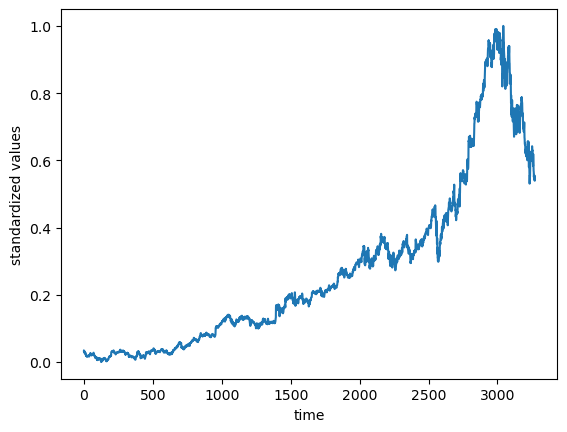

In [12]:
plt.plot(train_scaled)
plt.xlabel('time')
plt.ylabel('standardized values')
plt.show()

In [14]:
x_train = []
y_train = []
time = 60
for i in range(60, train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [15]:
x_train.shape

(3212, 60)

In [16]:
y_train.shape

(3212,)

In [19]:
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3212, 60, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

model = Sequential()
model.add(SimpleRNN(units = 50, return_sequences = True, activation = 'tanh', input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50, return_sequences = True, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50, return_sequences = True, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)               

In [22]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1)

Epoch 1/100
91/91 [==============================] - 11s 76ms/step - loss: 0.2726 - val_loss: 0.0276
Epoch 2/100
91/91 [==============================] - 7s 72ms/step - loss: 0.1096 - val_loss: 0.0237
Epoch 3/100
91/91 [==============================] - 6s 69ms/step - loss: 0.0478 - val_loss: 0.0083
Epoch 4/100
91/91 [==============================] - 6s 70ms/step - loss: 0.0313 - val_loss: 0.0258
Epoch 5/100
91/91 [==============================] - 6s 70ms/step - loss: 0.0203 - val_loss: 0.0153
Epoch 6/100
91/91 [==============================] - 6s 69ms/step - loss: 0.0158 - val_loss: 0.0219
Epoch 7/100
91/91 [==============================] - 6s 71ms/step - loss: 0.0105 - val_loss: 0.0057
Epoch 8/100
91/91 [==============================] - 6s 68ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 9/100
91/91 [==============================] - 6s 70ms/step - loss: 0.0068 - val_loss: 0.0010
Epoch 10/100
91/91 [==============================] - 6s 70ms/step - loss: 0.0060 - val_loss: 0.002

In [23]:
data = pd.concat((df_train['Open'], df_test['Open']), axis = 0)

In [24]:
test_input = data.iloc[len(data) - len(df_test) - time:].values
test_input.shape

(203,)

In [31]:
test_input = test_input.reshape(-1,1)
test_input.shape

(203, 1)

In [32]:
test_scaled = mms.fit_transform(test_input)

In [34]:
x_test = []
for i in range(time, test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i, 0])
x_test = np.array(x_test)
x_test.shape

(143, 60)

In [35]:
x_test = np.reshape(x_test, newshape = (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(143, 60, 1)

In [47]:
y_test = df_test.loc[:,['Open']].values

In [48]:
y_pred = model.predict(x_test)

5/5 [==============================] - 0s 27ms/step


In [49]:
y_pred = mms.inverse_transform(y_pred)

In [50]:
output = model.evaluate(x= x_test, y= y_test)

5/5 [==============================] - 1s 29ms/step - loss: 11619.1016


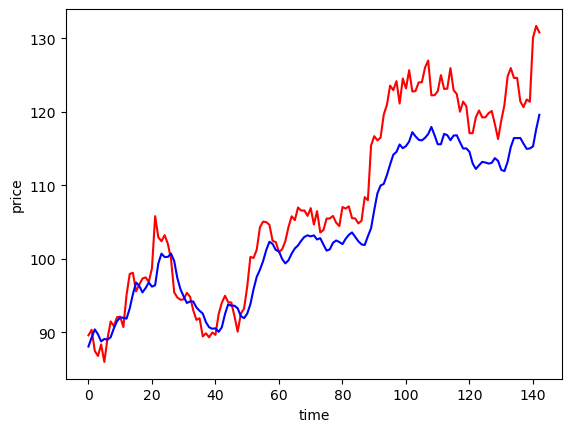

In [51]:
plt.plot(y_test, color = 'red', label = 'Actual Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()